In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn import metrics

In [17]:
breastcancer_df = pd.read_csv('breast-cancer-wisconsin.data')

# I got the column names from the breast-cancer-wisconsin.names file
breastcancer_df.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                           'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
                           'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class:']

breastcancer_df['Bare Nuclei'] = breastcancer_df['Bare Nuclei'].replace('?','1')
breastcancer_data = breastcancer_df.drop(columns=['Class:', 'Sample code number'])
breastcancer_target = breastcancer_df[['Class:']]


In [18]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             breastcancer_data, breastcancer_target, test_size = 0.25, random_state=42)

In [19]:
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=7)

In [20]:
predictions = knn.predict(X_test)

In [21]:
roc = knn.score(X_test, y_test)
roc

0.9771428571428571

In [22]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[111,   4],
       [  0,  60]])

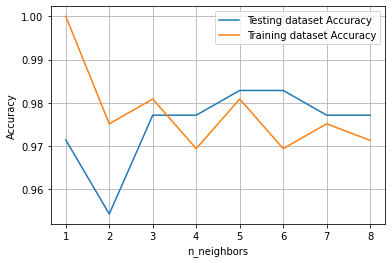

In [23]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.grid()
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()